In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import DataFrame,Series
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None


In [2]:
import seaborn as sns
import tensorflow as tf

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df.groupby('Geography').describe()

RowNumber                                                           \
              count         mean          std  min      25%     50%      75%   
Geography                                                                      
France       5014.0  5025.228560  2873.666719  1.0  2585.25  5003.5  7495.75   
Germany      2509.0  5000.278996  2918.980192  8.0  2461.00  4997.0  7583.00   
Spain        2477.0  4950.667743  2881.454458  2.0  2356.00  5000.0  7435.00   

                   CustomerId                                          \
               max      count          mean           std         min   
Geography                                                               
France     10000.0     5014.0  1.569065e+07  71375.837573  15565714.0   
Germany     9999.0     2509.0  1.569056e+07  73228.429284  15565779.0   
Spain       9993.0     2477.0  1.569192e+07  71765.540066  15565701.0   

                                                            CreditScore  \
                   25%         50%          75%         max       count   
Geography                                                                 
France     15628605.75  15690770.0  15752173.75  15815660.0      5014.0   
Germany    15627395.00  15689886.0  15755731.00  15815656.0      2509.0   
Spain      15629545.00  15691792.0  15753754.00  15815690.0      2477.0   

                                                                        Age  \
                 mean        std    min    25%    50%    75%    max   count   
Geography                                                                     
France     649.668329  97.016799  350.0  582.0  653.0  717.0  850.0  5014.0   
Germany    651.453567  98.168937  350.0  584.0  651.0  722.0  850.0  2509.0   
Spain      651.333872  94.365051  350.0  587.0  651.0  715.0  850.0  2477.0   

                                                               Tenure  \
                mean        std   min   25%   50%   75%   max   count   
Geography                                                               
France     38.511767  10.469459  18.0  31.0  37.0  43.0  92.0  5014.0   
Germany    39.771622  10.519143  18.0  32.0  38.0  45.0  84.0  2509.0   
Spain      38.890997  10.446119  18.0  32.0  37.0  44.0  88.0  2477.0   

                                                        Balance  \
               mean       std  min  25%  50%  75%   max   count   
Geography                                                         
France     5.004587  2.888475  0.0  2.0  5.0  7.0  10.0  5014.0   
Germany    5.009964  2.935154  0.0  2.0  5.0  8.0  10.0  2509.0   
Spain      5.032297  2.856660  0.0  3.0  5.0  8.0  10.0  2477.0   

                                                                        \
                    mean           std       min        25%        50%   
Geography                                                                
France      62092.636516  64133.565524      0.00       0.00   62153.50   
Germany    119730.116134  27022.006157  27288.43  102800.72  119703.10   
Spain       61818.147763  64235.555208      0.00       0.00   61710.44   

                                  NumOfProducts                                \
                   75%        max         count      mean       std  min  25%   
Geography                                                                       
France     121444.8775  238387.56        5014.0  1.530913  0.570347  1.0  1.0   
Germany    137560.3800  214346.96        2509.0  1.519729  0.619420  1.0  1.0   
Spain      121056.6300  250898.09        2477.0  1.539362  0.564646  1.0  1.0   

                         HasCrCard                                          \
           50%  75%  max     count      mean       std  min  25%  50%  75%   
Geography                                                                    
France     1.0  2.0  4.0    5014.0  0.706621  0.455356  0.0  0.0  1.0  1.0   
Germany    1.0  2.0  4.0    2509.0  0.713830  0.452060  0.0  0.0  1.0  1.0   


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.shape

(10000, 14)

In [10]:
df['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

**Univariate analysis**

* Numerical columns

In [11]:
len(df.select_dtypes(exclude='object').columns)

11

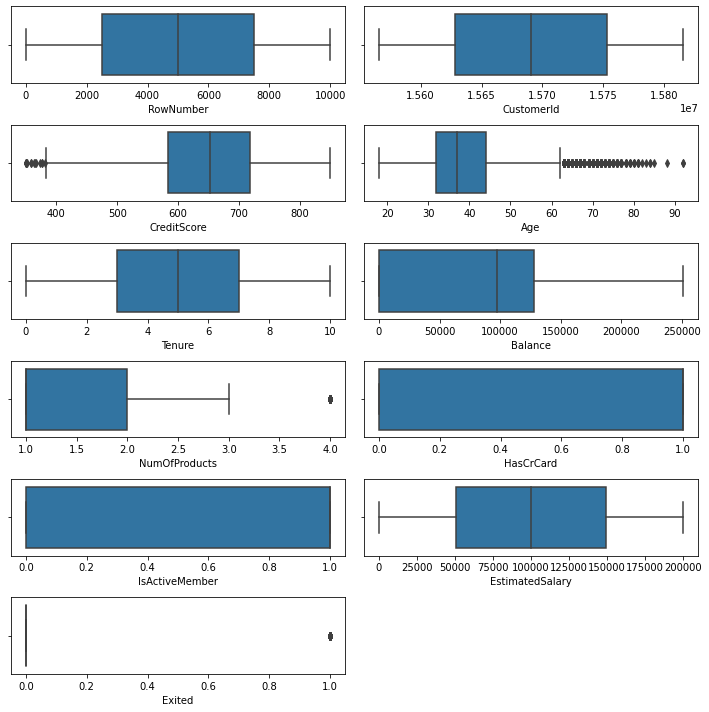

In [12]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include=np.number):
  plt.subplot(6,2,c)
  sns.boxplot(df[i])
  c=c+1
plt.tight_layout()
plt.show()

In [13]:
df.std()

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

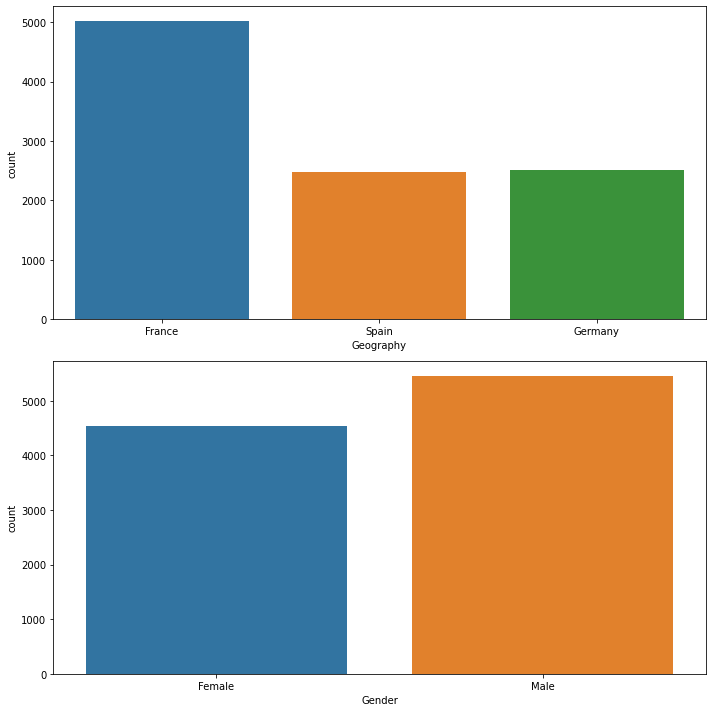

In [14]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include='object').drop('Surname',axis=1).columns:
  plt.subplot(2,1,c)
  sns.countplot(df[i])
  c=c+1
plt.tight_layout()
plt.show()

In [15]:
len(df['CustomerId'].unique())

10000

In [16]:
# Droping customerid and rownumber
df.drop(['CustomerId','RowNumber'],axis=1,inplace=True)

**Bivariate Analysis**

<AxesSubplot:>

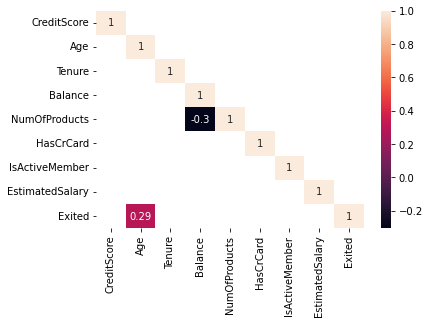

In [17]:
sns.heatmap(df.corr()[abs(df.corr())>0.2],annot=True,mask=np.triu(df.corr(),k=1))

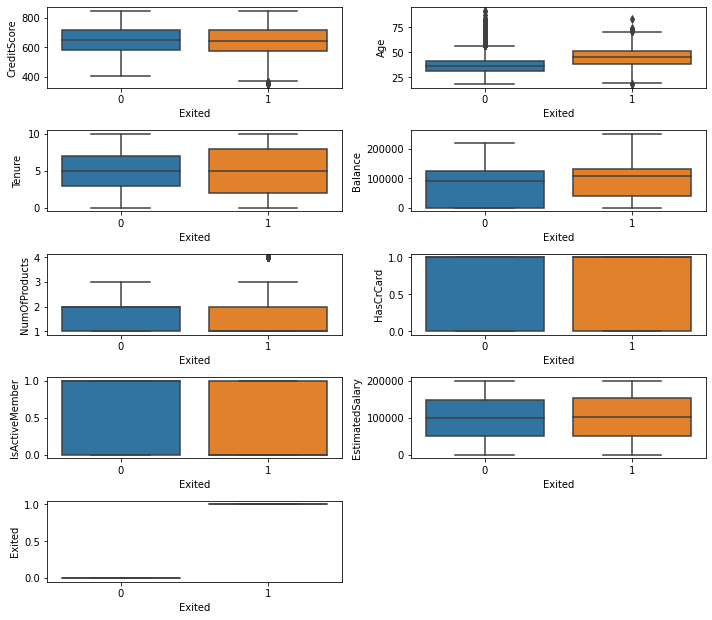

In [18]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include=np.number):
  plt.subplot(6,2,c)
  sns.boxplot(df['Exited'],df[i])
  c=c+1
plt.tight_layout()
plt.show()

In [19]:
df.select_dtypes(include='object').drop('Surname',axis=1).columns

Index(['Geography', 'Gender'], dtype='object')

In [20]:
pd.crosstab(df['Exited'],df[i])

Exited,0,1
Exited,,
0,7963,0
1,0,2037


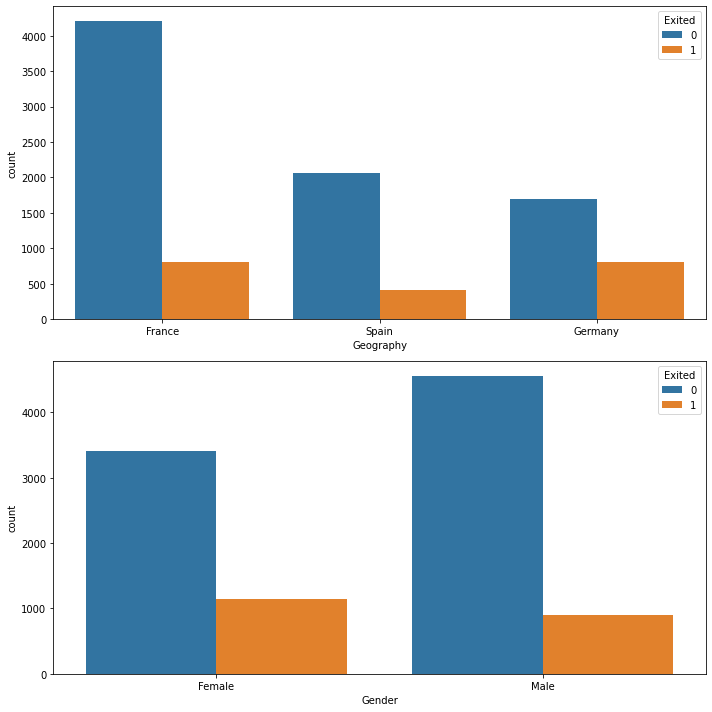

In [21]:
c=1
plt.figure(figsize=[10,10])
for i in df.select_dtypes(include='object').drop('Surname',axis=1).columns:
  plt.subplot(2,1,c)
  sns.countplot(df[i],hue=df['Exited'])
  c=c+1
plt.tight_layout()
plt.show()

**Statistical analysis**

In [22]:
## Checking of normality
for i in df.select_dtypes(include=np.number).columns:
  print(stats.shapiro(df[i]))
  print(i)

ShapiroResult(statistic=0.9939263463020325, pvalue=3.532837989895404e-20)
CreditScore
ShapiroResult(statistic=0.9441365003585815, pvalue=0.0)
Age
ShapiroResult(statistic=0.9486214518547058, pvalue=0.0)
Tenure
ShapiroResult(statistic=0.8455799221992493, pvalue=0.0)
Balance
ShapiroResult(statistic=0.7061033248901367, pvalue=0.0)
NumOfProducts
ShapiroResult(statistic=0.5722110271453857, pvalue=0.0)
HasCrCard
ShapiroResult(statistic=0.6363102197647095, pvalue=0.0)
IsActiveMember
ShapiroResult(statistic=0.9566370844841003, pvalue=0.0)
EstimatedSalary
ShapiroResult(statistic=0.4939334988594055, pvalue=0.0)
Exited


* Since the data is not normal we will doing krushkal test

In [81]:
df1=DataFrame()
pv=[]
for i in df.select_dtypes(include=np.number).columns:
  a=[]
  for j in df['Exited'].unique():
    globals()['a%s' %j]=df[df['Exited']==j][[i]]
    a.append(globals()['a%s' %j])
  k1,k2=a
  zst,pval=stats.kruskal(k1,k2)
  pv.append(pval)
df1['feat']=[i  for i in df.select_dtypes(include=np.number).columns]
df1['pvalue']=[j for i in pv for j in i]
df1

,feat,pvalue
0,CreditScore,1.986843e-02
1,Age,3.209954e-230
2,Tenure,1.621925e-01
3,Balance,1.115785e-28
4,NumOfProducts,5.274780e-36
5,HasCrCard,4.753874e-01
6,IsActiveMember,6.027161e-55
7,EstimatedSalary,2.270499e-01
8,Exited,0.000000e+00


In [94]:
n_col=list(df1[df1['pvalue']<0.05]['feat'])[:-1]
df1[df1['pvalue']<0.05][['feat']]

,feat
0,CreditScore
1,Age
3,Balance
4,NumOfProducts
6,IsActiveMember
8,Exited


* Above columns are the impacting columns

In [98]:

for i in df.select_dtypes(include='object').drop('Surname',axis=1).columns:
  zst,pv,dof,exp=stats.chi2_contingency(pd.crosstab(df['Exited'],df[i]))
  print(i,pv)


Geography 3.830317605354266e-66
Gender 2.2482100097131755e-26


* Both categorical columns are significant

In [99]:
## Lets change the surname columns into numerical
df['Surname']=df['Surname'].apply(lambda x:len(x))

In [100]:
df.head(4)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,4,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,4,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [101]:
# Lets see if Surname in impactful or not
s1=df[df['Exited']==1]['Surname']
s2=df[df['Exited']==1]['Surname']
print(stats.shapiro(df['Surname']))
stats.kruskal(s1,s2)

ShapiroResult(statistic=0.9590879678726196, pvalue=0.0)


KruskalResult(statistic=0.0, pvalue=1.0)

* Surname is not significant

* So finally dropping credit score and Surname

In [102]:
df.drop(['CreditScore','Surname'],axis=1,inplace=True)

**Label Encoding**

In [104]:
df=pd.get_dummies(df,drop_first=True)

In [105]:
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [106]:
ndf=df.drop('Exited',axis=1)

**Scaling the dataset**

In [110]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(ndf)
scaled_df=DataFrame(scaled,columns=ndf.columns)
scaled_df.head(5)

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


**Splitting the dataset**

In [113]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(scaled_df,df['Exited'],test_size=0.20)


In [114]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8000, 10), (2000, 10), (8000,), (2000,))

**ANN Model**

In [115]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(6,activation='relu'))
ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
ann.fit(xtrain,ytrain,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.7377 - accuracy: 0.5123
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5508 - accuracy: 0.7969
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.7994
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4371 - accuracy: 0.8096
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8166
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8310
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8432
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3656 - accuracy: 0.8472
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8506
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3529 - accura

In [116]:
pred=ann.predict(xtest)
pred=[1 if i>0.5 else 0 for i in pred]

63/63 [==============================] - 0s 2ms/step


In [118]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1579
           1       0.81      0.45      0.58       421

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



<AxesSubplot:>

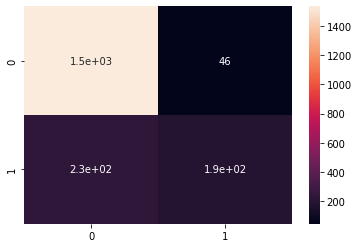

In [121]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True)

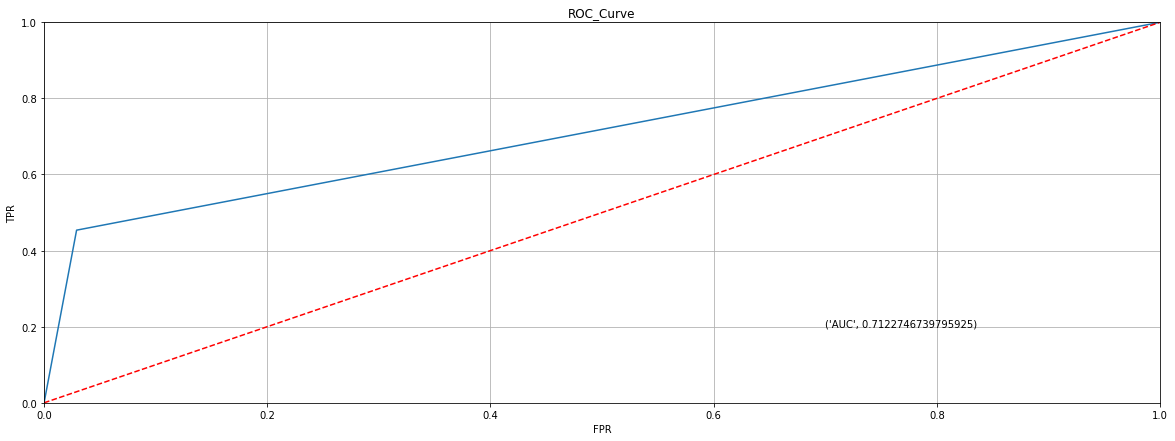

In [127]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure(figsize=[20,7])
fpr,tpr,thr=roc_curve(ytest,pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.7,y=0.2,s=('AUC',roc_auc_score(ytest,pred)))
plt.title('ROC_Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()
